In [93]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models

In [94]:
f = open("images/sino0.txt", 'r')
line0 = f.read()
print(line0)
f.close

   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	  -0.0000000e+00	  -0.0000000e+00	  -0.0000000e+00	   1.0000000e+00	  -0.0000000e+00	   1.0000000e+00	  -0.0000000e+00	   1.0000000e+00	  -0.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+

<function TextIOWrapper.close()>

In [95]:
import numpy as np
metal0_img = np.empty((256,360))
k = 0
l = 0
for i, j in enumerate(line0):
    if j == '\t':
        metal0_img[k,l] = float(line0[i-14:i])
        k = k+1
        if k == 256:
            k = 0
            l = l+1

<function matplotlib.pyplot.colorbar(mappable=None, cax=None, ax=None, **kw)>

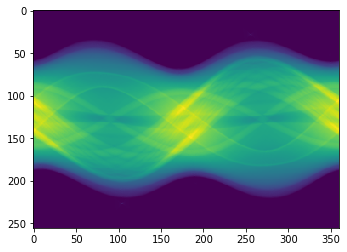

In [96]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

plt.imshow(metal0_img)
plt.colorbar

In [97]:
f = open("images/sino1.txt", 'r')
line = f.read()
print(line)
f.close

   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	  -0.0000000e+00	  -0.0000000e+00	  -0.0000000e+00	   1.0000000e+00	  -0.0000000e+00	   1.0000000e+00	  -0.0000000e+00	   1.0000000e+00	  -0.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+

<function TextIOWrapper.close()>

In [98]:
import numpy as np
metal1_img = np.empty((256,360))
k = 0
l = 0
for i, j in enumerate(line):
    if j == '\t':
        metal1_img[k,l] = float(line[i-14:i])
        k = k+1
        if k == 256:
            k = 0
            l = l+1

<function matplotlib.pyplot.colorbar(mappable=None, cax=None, ax=None, **kw)>

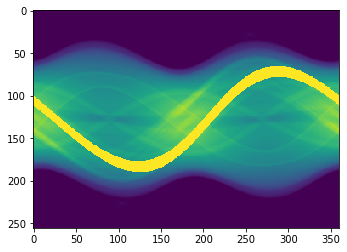

In [99]:
plt.imshow(metal1_img)
plt.colorbar

In [100]:
for c in range (360):
    b = []
    for a in range (256):
        if metal1_img[a,c] == 300:
            b.append(a)
            if len(b) == 16:
                print(c)
test_depth = 8

In [101]:
result_img_up = metal0_img
window_size = 4

k = 0
z = 0

for i in range(256-window_size):
    for j in range(360):
        if 0 in result_img_up[i:i+window_size,j]:
            z=0
        else:
            if 300 in result_img_up[i:i+window_size,j]:
                z = 0
            else:
                if result_img_up[i+window_size,j] >= 250:
                    z = 0
                else:
                    if result_img_up[i+window_size,j] <= 50:
                        z = 0
                    else:
                        k = k+1
train_data_up = np.empty((k,window_size,1,1))
result_data_up = np.empty((k,1))

In [102]:
model_up = models.Sequential()
model_up.add(layers.Conv2D(32, (1, 1), activation='relu', input_shape=(window_size, 1, 1)))
model_up.add(layers.MaxPooling2D((1, 1)))
model_up.add(layers.Conv2D(64, (1, 1), activation='relu'))
model_up.add(layers.MaxPooling2D((1, 1)))
model_up.add(layers.Conv2D(128, (1, 1), activation='relu'))
model_up.add(layers.Flatten())
model_up.add(layers.Dense(128, activation='relu'))
model_up.add(layers.Dense(256, activation='softmax'))
model_up.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model_up.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 4, 1, 32)          64        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 1, 32)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 1, 64)          2112      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 1, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 4, 1, 128)         8320      
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)              

In [103]:
a = [0,1,2,3,4]
a[0:3]

[0, 1, 2]

In [104]:
k = 0

for i in range(256-window_size):
    for j in range(360):
        if 0 in result_img_up[i:i+window_size,j]:
            z=0
        else:
            if 300 in result_img_up[i:i+window_size,j]:
                z = 0
            else:
                if result_img_up[i+window_size,j] >= 250:
                    z = 0
                else:
                    if result_img_up[i+window_size,j] <= 50:
                        z = 0
                    else:
                        for v in range(window_size):
                            train_data_up[k,v,0,0] = result_img_up[i+v,j]
                        result_data_up[k,0] = int(result_img_up[i+window_size,j])
                        k = k+1
print(train_data_up.shape)
print(result_data_up.shape)

model_up.fit(train_data_up, result_data_up, epochs=10)

(50508, 4, 1, 1)
(50508, 1)
Epoch 1/10
1579/1579 [==============================] - 2s 1ms/step - loss: 5.1100 - accuracy: 0.0152
Epoch 2/10
1579/1579 [==============================] - 2s 1ms/step - loss: 4.1978 - accuracy: 0.0332
Epoch 3/10
1579/1579 [==============================] - 2s 1ms/step - loss: 3.5689 - accuracy: 0.0584
Epoch 4/10
1579/1579 [==============================] - 2s 1ms/step - loss: 3.3565 - accuracy: 0.0678
Epoch 5/10
1579/1579 [==============================] - 2s 1ms/step - loss: 3.2616 - accuracy: 0.0727
Epoch 6/10
1579/1579 [==============================] - 2s 1ms/step - loss: 3.1988 - accuracy: 0.0776
Epoch 7/10
1579/1579 [==============================] - 2s 1ms/step - loss: 3.1291 - accuracy: 0.0878
Epoch 8/10
1579/1579 [==============================] - 2s 1ms/step - loss: 3.0990 - accuracy: 0.0882
Epoch 9/10
1579/1579 [==============================] - 2s 1ms/step - loss: 3.0819 - accuracy: 0.0893
Epoch 10/10
1579/1579 [==============================]

In [105]:
result_img_down = metal0_img
window_size = 4

k = 0
z = 0

for i in range(256-window_size):
    for j in range(360):
        if 0 in result_img_down[i+1:i+1+window_size,j]:
            z=0
        else:
            if 300 in result_img_down[i+1:i+1+window_size,j]:
                z = 0
            else:
                if result_img_down[i,j] >= 250:
                    z = 0
                else:
                    if result_img_down[i,j] <= 50:
                        z = 0
                    else:
                        k = k+1
train_data_down = np.empty((k,window_size,1,1))
result_data_down = np.empty((k,1))

In [106]:
model_down = models.Sequential()
model_down.add(layers.Conv2D(32, (1, 1), activation='relu', input_shape=(window_size, 1, 1)))
model_down.add(layers.MaxPooling2D((1, 1)))
model_down.add(layers.Conv2D(64, (1, 1), activation='relu'))
model_down.add(layers.MaxPooling2D((1, 1)))
model_down.add(layers.Conv2D(128, (1, 1), activation='relu'))
model_down.add(layers.Flatten())
model_down.add(layers.Dense(128, activation='relu'))
model_down.add(layers.Dense(256, activation='softmax'))
model_down.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model_down.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 4, 1, 32)          64        
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 1, 32)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 1, 64)          2112      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 4, 1, 64)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 4, 1, 128)         8320      
_________________________________________________________________
flatten_3 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)              

In [107]:
a = [0,1,2,3,4]
a[0:3]

[0, 1, 2]

In [108]:
k = 0

for i in range(256-window_size):
    for j in range(360):
        if 0 in result_img_down[i+1:i+1+window_size,j]:
            z=0
        else:
            if 300 in result_img_down[i+1:i+1+window_size,j]:
                z = 0
            else:
                if result_img_down[i,j] >= 250:
                    z = 0
                else:
                    if result_img_down[i,j] <= 50:
                        z = 0
                    else:
                        for v in range(window_size):
                            train_data_down[k,v,0,0] = result_img_down[i+1+v,j]
                        result_data_down[k,0] = int(result_img_down[i,j])
                        k = k+1
print(train_data_down.shape)
print(result_data_down.shape)

model_down.fit(train_data_down, result_data_down, epochs=10)

(50508, 4, 1, 1)
(50508, 1)
Epoch 1/10
1579/1579 [==============================] - 2s 1ms/step - loss: 5.0883 - accuracy: 0.0136
Epoch 2/10
1579/1579 [==============================] - 2s 1ms/step - loss: 4.0551 - accuracy: 0.0361
Epoch 3/10
1579/1579 [==============================] - 2s 1ms/step - loss: 3.4652 - accuracy: 0.0621
Epoch 4/10
1579/1579 [==============================] - 2s 1ms/step - loss: 3.2475 - accuracy: 0.0775
Epoch 5/10
1579/1579 [==============================] - 2s 1ms/step - loss: 3.1501 - accuracy: 0.0820
Epoch 6/10
1579/1579 [==============================] - 2s 1ms/step - loss: 3.0561 - accuracy: 0.0914
Epoch 7/10
1579/1579 [==============================] - 2s 1ms/step - loss: 3.0102 - accuracy: 0.0933
Epoch 8/10
1579/1579 [==============================] - 2s 1ms/step - loss: 2.9719 - accuracy: 0.0970
Epoch 9/10
1579/1579 [==============================] - 2s 1ms/step - loss: 2.9129 - accuracy: 0.1022
Epoch 10/10
1579/1579 [==============================]

In [136]:
test_img_up = metal1_img

In [137]:
for i in range(256-window_size):
    for j in range(360):
        if 300 in test_img_up[i:i+window_size, j]:
            z = 0
        else:
            if test_img_up[i+window_size,j] == 300:
                test_data_up = np.empty((1,window_size,1,1))
                for v in range(window_size):
                    test_data_up[0,v,0,0] = test_img_up[i+v,j]
                prediction = model_up.predict(test_data_up)
                test_img_up[i+window_size,j] = np.argmax(prediction)
                

<function matplotlib.pyplot.colorbar(mappable=None, cax=None, ax=None, **kw)>

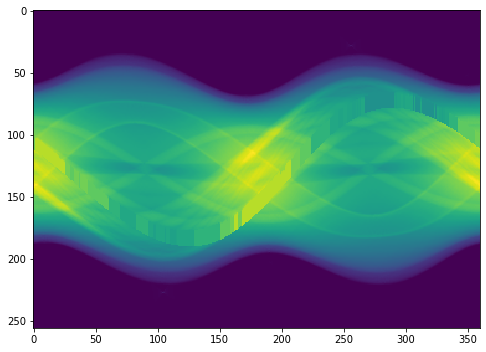

In [138]:
plt.figure(figsize=(8,12))
plt.imshow(test_img_up[:,0:360])
plt.colorbar

In [157]:
import numpy as np
metal1_img = np.empty((256,360))
k = 0
l = 0
for i, j in enumerate(line):
    if j == '\t':
        metal1_img[k,l] = float(line[i-14:i])
        k = k+1
        if k == 256:
            k = 0
            l = l+1

<function matplotlib.pyplot.colorbar(mappable=None, cax=None, ax=None, **kw)>

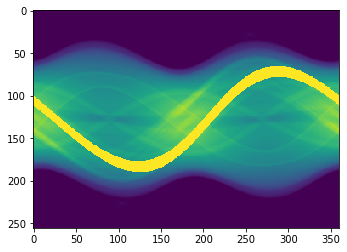

In [158]:
plt.imshow(metal1_img)
plt.colorbar

In [159]:
for c in range (360):
    b = []
    for a in range (256):
        if metal1_img[a,c] == 300:
            b.append(a)
            if len(b) == 16:
                print(c)
test_depth = 8

In [160]:
test_img_down = metal1_img

In [161]:
for i in range(256-window_size):
    for j in range(360):
        if 300 in test_img_down[257-i-window_size:257-i, j]:
            z = 0
        else:
            if test_img_down[257-i-window_size,j] == 300:
                test_data_down = np.empty((1,window_size,1,1))
                for v in range(window_size):
                    test_data_down[0,v,0,0] = test_img_down[257-i-window_size+v,j]
                prediction = model_down.predict(test_data_down)
                test_img_down[257-i-window_size,j] = np.argmax(prediction)
                

<function matplotlib.pyplot.colorbar(mappable=None, cax=None, ax=None, **kw)>

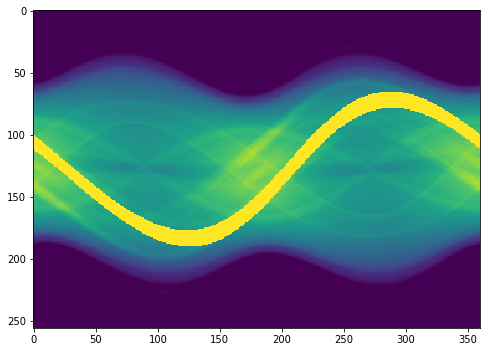

In [162]:
plt.figure(figsize=(8,12))
plt.imshow(test_img_down[:,0:360])
plt.colorbar

In [185]:
import numpy as np
metal1_img = np.empty((256,360))
k = 0
l = 0
for i, j in enumerate(line):
    if j == '\t':
        metal1_img[k,l] = float(line[i-14:i])
        k = k+1
        if k == 256:
            k = 0
            l = l+1

<function matplotlib.pyplot.colorbar(mappable=None, cax=None, ax=None, **kw)>

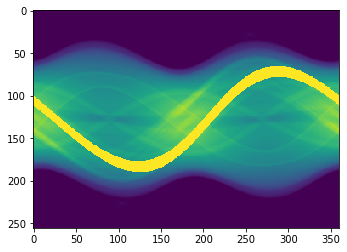

In [186]:
plt.imshow(metal1_img)
plt.colorbar

In [187]:
for c in range (360):
    b = []
    for a in range (256):
        if metal1_img[a,c] == 300:
            b.append(a)
            if len(b) == 16:
                print(c)
test_depth = 8

In [188]:
test_img = metal1_img

In [189]:
for i in range(256-window_size):
    for j in range(360):
        if 300 in test_img[i:i+window_size, j]:
            z = 0
        else:
            if test_img[i+window_size,j] == 300:
                for k in range (test_depth):
                    test_data = np.empty((1,window_size,1,1))
                    for v in range(window_size):
                        test_data[0,v,0,0] = test_img[i+v,j]
                    prediction = model_up.predict(test_data)
                    test_img[i+window_size,j] = np.argmax(prediction)
                    test_data = np.empty((1,window_size,1,1))
                    for v in range(window_size):
                        test_data[0,v,0,0] = test_img[i+window_size+v+test_depth*2-k+1,j]
                    prediction = model_down.predict(test_data)
                    test_img[i+window_size+test_depth*2-k,j] = np.argmax(prediction)
        
        
        
        #if 300 in test_img[257-i-window_size:257-i, j]:
#             z = 0
#         else:
#             if test_img[257-i-window_size,j] == 300:
#                 test_data = np.empty((1,window_size,1,1))
#                 for v in range(window_size):
#                     test_data[0,v,0,0] = test_img_down[257-i-window_size+v,j]
#                 prediction = model_down.predict(test_data_down)
#                 test_img_down[257-i-window_size,j] = np.argmax(prediction)
                

<function matplotlib.pyplot.colorbar(mappable=None, cax=None, ax=None, **kw)>

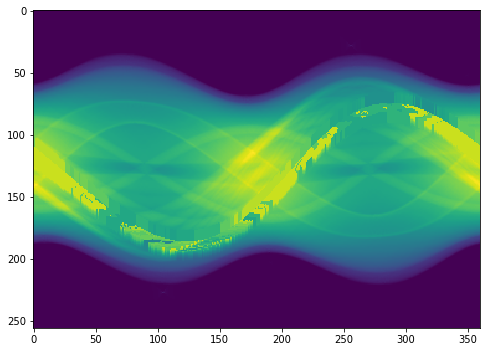

In [190]:
plt.figure(figsize=(8,12))
plt.imshow(test_img[:,0:360])
plt.colorbar

In [47]:
# plt.imshow(result_img)
# plt.colorbar
# plt.axis('off'), plt.xticks([]), plt.yticks([])
# plt.tight_layout()
# plt.subplots_adjust(left = 0, bottom = 0, right = 1, top = 1, hspace = 0, wspace = 0)
# plt.savefig('images/RCNN3(100)_test.png', bbox_inches = 'tight', pad_inches=0, dpi=100)

In [48]:
# np.savetxt('images/CNN_Metal3_3by3_txt.txt', result_img)